In [5]:
from GHZ import GHZ_Experiment
from selene_sim import DepolarizingErrorModel, Quest

In [6]:
# select parameters and build experiment

n_qubits = 10
filename = 'exp_GHZ_example.p'

exp = GHZ_Experiment(n_qubits, filename=filename)
exp.add_settings()

Having setup our GHZ experiment, we can now either simulate using a local simulator or submit to a hardware or emulator backend.

### Run local simulation using Selene

In [3]:
# setup error model

error_model = DepolarizingErrorModel(
    #random_seed=1234,
    # single qubit gate error rate
    p_1q=4e-3,
    # two qubit gate error rate
    p_2q=1e-3,
    # set state preparation and measurement error rates to 0
    p_meas=0,
    p_init=0,
)

In [4]:
# simulate experiment

shots = 100
simulator = Quest()

exp.sim(shots, error_model=error_model, simulator=simulator)

Simulating ...
1/20 circuits complete
2/20 circuits complete
3/20 circuits complete
4/20 circuits complete
5/20 circuits complete
6/20 circuits complete
7/20 circuits complete
8/20 circuits complete
9/20 circuits complete
10/20 circuits complete
11/20 circuits complete
12/20 circuits complete
13/20 circuits complete
14/20 circuits complete
15/20 circuits complete
16/20 circuits complete
17/20 circuits complete
18/20 circuits complete
19/20 circuits complete
20/20 circuits complete


### Submit to Quantinuum Hardware or Emulator backend using Nexus 

In [1]:
# Choose domain and login to Nexus

import qnexus
from qnexus.config import CONFIG

CONFIG.domain = "qa.myqos.com"
qnexus.login()

🌐 Browser log in initiated.


╭────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                        │
│         Confirm that the browser shows the following code and click 'allow device':    │
│                                                                                        │
│                                      DqLBHi                                            │
│                                                                                        │
╰────────────────────────────────────────────────────────────────────────────────────────╯

Browser didn't open automatically? Use this link: https://qa.myqos.com/auth/device/browser?otp=DqLBHi0GLQZogfNw1H_PFnAlMzUTXy6hfwuj9WFP-zjSdZxq7aqB312NzDwqYT3Lye-4Z2De0w91obII5mjH-Q
✅ Successfully logged in as karl.mayer@quantinuum.com using the browser.


In [2]:
# choose nexus project and setup quantinuum backend config

project = qnexus.projects.get_or_create(name='GHZ-example-project')
qnexus.context.set_active_project(project)

backend_config = qnexus.QuantinuumConfig(device_name='Helios-1E')

In [7]:
# submit experiment. Returns a qnexus ExecuteJobRef

shots = 100

execute_job_ref = exp.submit(shots, backend_config)

In [11]:
# inspect status of the execution job

qnexus.jobs.status(execute_job_ref)

JobStatus(status=<StatusEnum.COMPLETED: 'Circuit has completed. Results are ready.'>, message='The job is completed.', error_detail=None, completed_time=datetime.datetime(2025, 5, 22, 19, 13, 36, 110495, tzinfo=datetime.timezone.utc), queued_time=None, submitted_time=datetime.datetime(2025, 5, 22, 19, 5, 3, 959314, tzinfo=datetime.timezone.utc), running_time=datetime.datetime(2025, 5, 22, 19, 5, 34, 927398, tzinfo=datetime.timezone.utc), cancelled_time=None, error_time=None, queue_position=None)

In [12]:
# retrieve results

exp.retrieve(execute_job_ref)

### Analyze experiment results

GHZ n=10 Fidelity = 0.978 +/- 0.0049



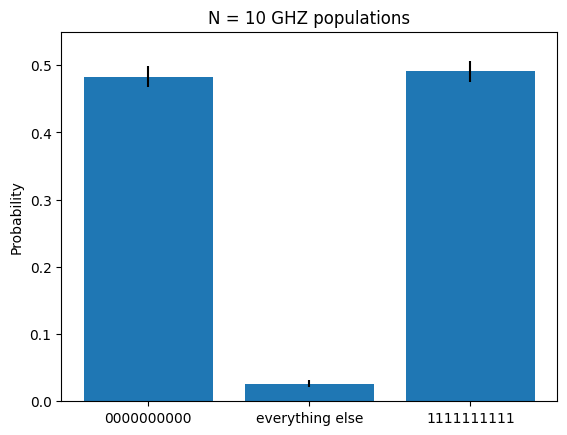

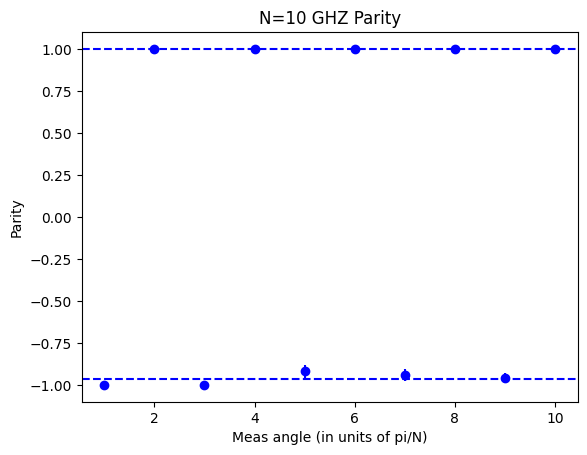

In [13]:
exp.analyze_results()

In [ ]:
# save experiment object to working directory

exp.save()